In [1]:
import pandas as pd
from pathlib import Path
from plot_params import *
from itertools import chain
from collections import Counter


/tscc/nfs/home/hsher/miniconda3/envs/my_metadensity/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/tscc/nfs/home/hsher/miniconda3/envs/my_metadensity/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


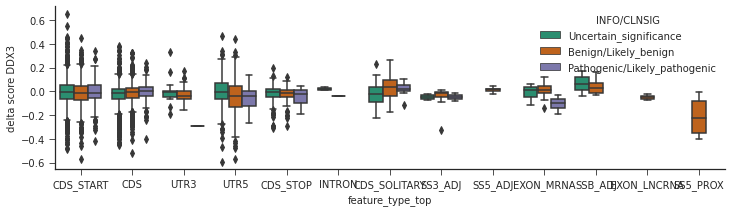

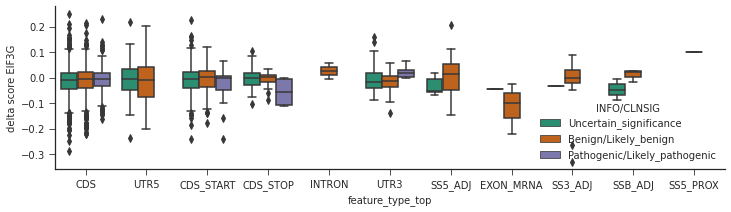

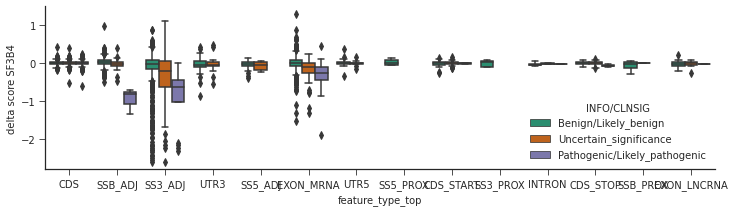

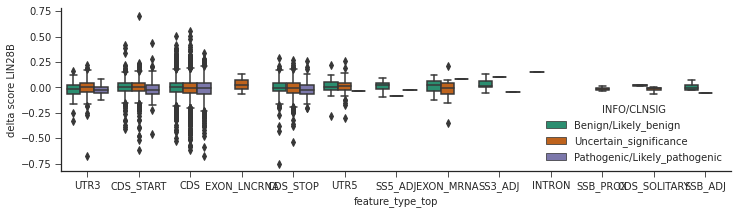

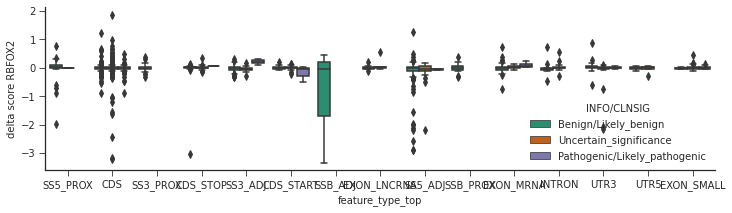

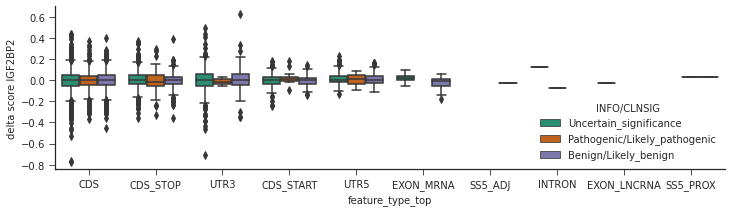

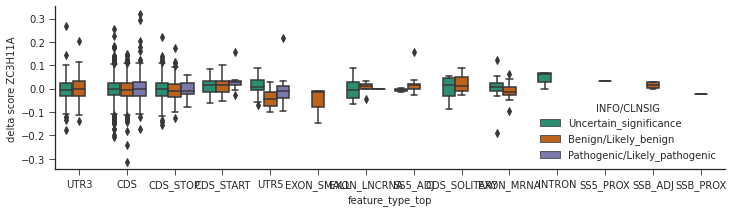

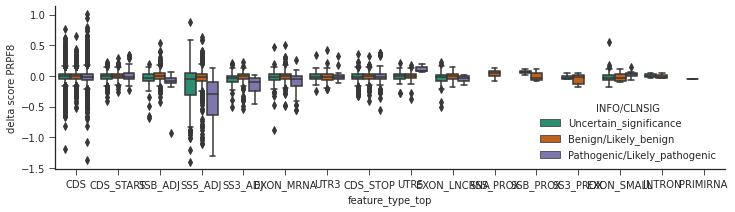

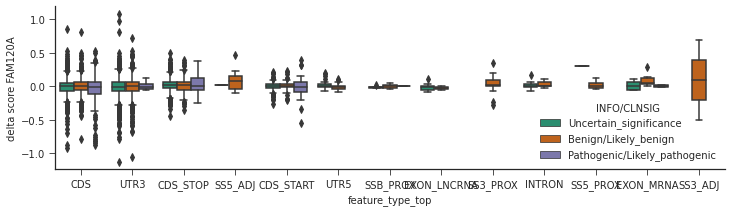

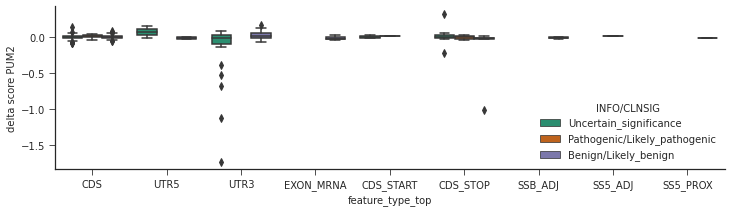

In [3]:
indir = Path('/tscc/nfs/home/hsher/scratch/variant_clinvar_score')
outf = figdir / 'clinvar.xlsx'
to_group = 'feature_type_top'
all_stats = []
all_pheno = []

with pd.ExcelWriter(outf) as writer:  

    data = {}
    for f in indir.glob('*.variant_score.csv'):
        rbp = f.name.split('.')[0]
        df = pd.read_csv(f, index_col = 0)
        # clean up annotations
        df['INFO/CLNSIG'] = df['INFO/CLNSIG'].replace(
            'Likely_benign', 'Benign/Likely_benign').replace(
            'Benign', 'Benign/Likely_benign').replace(
            'Pathogenic', 'Pathogenic/Likely_pathogenic').replace(
            'Likely_pathogenic', 'Pathogenic/Likely_pathogenic').replace(
            'Conflicting_interpretations_of_pathogenicity', 'Uncertain_significance')
        df = df.loc[df['INFO/CLNSIG'].isin(['Uncertain_significance', 'Benign/Likely_benign','Pathogenic/Likely_pathogenic'])]
        
        data[rbp]=df
        df.to_excel(writer, sheet_name=rbp)
        f, ax = plt.subplots(figsize = (12,3))
        sns.boxplot(data = df,
                       x = 'feature_type_top',
                       y = 'delta_score',
                       hue = 'INFO/CLNSIG',
                       ax = ax,
    
                  )
        ax.set_ylabel(f'delta score {rbp}')
        
        
        sns.despine()
        plt.savefig(figdir/f'{rbp}.clinvar.scores.pdf')
        
        # count phenotype
        pheno_count = pd.Series(Counter(list(chain(*df.loc[df['delta_score']<-0.5, 'INFO/CLNDN'].str.split('|').to_list()))),
                               name = rbp)
        
        all_pheno.append(pheno_count)

In [3]:
all_pheno = pd.concat(all_pheno, axis = 1).fillna(0)

In [5]:
all_pheno.index

Index(['Inborn_genetic_diseases', 'Amyotrophic_lateral_sclerosis_type_21',
       'not_specified', 'Osteogenesis_imperfecta',
       'Polycystic_kidney_disease,_adult_type', 'not_provided',
       'Noonan_syndrome', 'Metachondromatosis',
       'Noonan_syndrome_with_multiple_lentigines',
       'Colorectal_cancer,_susceptibility_to,_10',
       ...
       'HYPERHOMOCYSTEINEMIA,_THROMBOTIC,_CBS-RELATED',
       'Deafness-lymphedema-leukemia_syndrome',
       'Monocytopenia_with_susceptibility_to_infections',
       'GATA2_deficiency_with_susceptibility_to_MDS/AML',
       'DDX41-related_hematologic_malignancy_predisposition_syndrome',
       'Joubert_syndrome_3', 'Retinal_dystrophy', 'Cardiac_arrhythmia',
       'Baller-Gerold_syndrome',
       'Growth_retardation,_intellectual_developmental_disorder,_hypotonia,_and_hepatopathy'],
      dtype='object', length=188)